# Feature Engineering Practice Notebook
This notebook contains a sample dataset and questions to practice feature engineering tasks.

## Dataset Overview
Here is a preview of the dataset you will work with:

In [3]:
import pandas as pd
df_orig = pd.read_csv('/Users/dinaeshs/Desktop/MLOps/Practice/Python_practice/Feature_Engineering/sample_feature_engineering_data.csv')
df_orig

,CustomerID,Age,AnnualIncome,PurchaseHistory,LastPurchaseDate,City
0,1,23.0,60000,"Electronics, Fashion",2025-01-01,New York
1,2,45.0,80000,"Groceries, Fashion",2024-12-15,San Francisco
2,3,31.0,50000,Electronics,2025-01-10,Chicago
3,4,35.0,75000,Fashion,2024-11-25,New York
4,5,NaN,40000,Groceries,NaN,Los Angeles



## Feature Engineering Questions

1. **Handling Missing Values**: Fill the missing values in the `Age` and `LastPurchaseDate` columns with appropriate values.
2. **Feature Extraction**: Extract the year, month, and day from the `LastPurchaseDate` column.
3. **One-Hot Encoding**: Convert the `City` column into one-hot encoded features.
4. **Frequency Encoding**: Perform frequency encoding on the `PurchaseHistory` column.
5. **Bucketization**: Divide customers into age groups (e.g., 18-30, 31-50, 51+) based on the `Age` column.
6. **Date Transformation**: Calculate the number of days since the last purchase for each customer.
7. **Feature Scaling**: Scale the `AnnualIncome` column using Min-Max scaling.
8. **Derived Features**: Create a new feature indicating the total number of categories in `PurchaseHistory`.
9. **Interaction Features**: Combine `City` and `PurchaseHistory` to create a new interaction feature.
10. **Outlier Detection**: Identify any outliers in the `AnnualIncome` column.


## Start Your Feature Engineering Tasks Below

#1. **Handling Missing Values**: Fill the missing values in the `Age` and `LastPurchaseDate` columns with appropriate values.

In [4]:
working_df= df_orig.copy()

In [5]:
working_df['Age'].fillna(working_df['Age'].mean(), inplace = True)

/var/folders/90/pfcv2btd0gn5512nyr4h_9yh0000gn/T/ipykernel_1297/4247053624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  working_df['Age'].fillna(working_df['Age'].mean(), inplace = True)


In [6]:
working_df

,CustomerID,Age,AnnualIncome,PurchaseHistory,LastPurchaseDate,City
0,1,23.0,60000,"Electronics, Fashion",2025-01-01,New York
1,2,45.0,80000,"Groceries, Fashion",2024-12-15,San Francisco
2,3,31.0,50000,Electronics,2025-01-10,Chicago
3,4,35.0,75000,Fashion,2024-11-25,New York
4,5,33.5,40000,Groceries,NaN,Los Angeles


2. **Feature Extraction**: Extract the year, month, and day from the `LastPurchaseDate` column.

In [7]:
working_df['Age'] = working_df['Age'].round(0)

In [8]:
working_df['Age'] = working_df['Age'].convert_dtypes(convert_integer=True)

In [9]:
working_df['LastPurchasemonth'] = pd.to_datetime(working_df['LastPurchaseDate']).dt.month.convert_dtypes(convert_integer=True)

In [10]:
working_df

,CustomerID,Age,AnnualIncome,PurchaseHistory,LastPurchaseDate,City,LastPurchasemonth
0,1,23,60000,"Electronics, Fashion",2025-01-01,New York,1
1,2,45,80000,"Groceries, Fashion",2024-12-15,San Francisco,12
2,3,31,50000,Electronics,2025-01-10,Chicago,1
3,4,35,75000,Fashion,2024-11-25,New York,11
4,5,34,40000,Groceries,NaN,Los Angeles,<NA>


In [11]:
working_df['LastPurchaseday'] = pd.to_datetime(working_df['LastPurchaseDate']).dt.day.convert_dtypes(convert_integer=True)

In [12]:
working_df

,CustomerID,Age,AnnualIncome,PurchaseHistory,LastPurchaseDate,City,LastPurchasemonth,LastPurchaseday
0,1,23,60000,"Electronics, Fashion",2025-01-01,New York,1,1
1,2,45,80000,"Groceries, Fashion",2024-12-15,San Francisco,12,15
2,3,31,50000,Electronics,2025-01-10,Chicago,1,10
3,4,35,75000,Fashion,2024-11-25,New York,11,25
4,5,34,40000,Groceries,NaN,Los Angeles,<NA>,<NA>


3. **One-Hot Encoding**: Convert the `City` column into one-hot encoded features.

In [13]:
working_df = pd.get_dummies(working_df, columns=['City'])
working_df

,CustomerID,Age,AnnualIncome,PurchaseHistory,LastPurchaseDate,LastPurchasemonth,LastPurchaseday,City_Chicago,City_Los Angeles,City_New York,City_San Francisco
0,1,23,60000,"Electronics, Fashion",2025-01-01,1,1,False,False,True,False
1,2,45,80000,"Groceries, Fashion",2024-12-15,12,15,False,False,False,True
2,3,31,50000,Electronics,2025-01-10,1,10,True,False,False,False
3,4,35,75000,Fashion,2024-11-25,11,25,False,False,True,False
4,5,34,40000,Groceries,NaN,<NA>,<NA>,False,True,False,False


4. **Frequency Encoding**: Perform frequency encoding on the `PurchaseHistory` column.

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

In [15]:
mlb = MultiLabelBinarizer()

In [16]:
data_split = [location.split(', ') for location in working_df['PurchaseHistory']]

In [17]:
data_split

[['Electronics', 'Fashion'],
 ['Groceries', 'Fashion'],
 ['Electronics'],
 ['Fashion'],
 ['Groceries']]

In [18]:
encoded_result = mlb.fit_transform(data_split)

In [19]:
encoded_result

array([[1, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [20]:
encoded_df = pd.DataFrame(encoded_result, columns=mlb.classes_)

In [21]:
encoded_df

,Electronics,Fashion,Groceries
0,1,1,0
1,0,1,1
2,1,0,0
3,0,1,0
4,0,0,1


In [22]:
working_df = pd.concat([working_df,encoded_df], axis=1)

In [23]:
working_df

,CustomerID,Age,AnnualIncome,PurchaseHistory,LastPurchaseDate,LastPurchasemonth,LastPurchaseday,City_Chicago,City_Los Angeles,City_New York,City_San Francisco,Electronics,Fashion,Groceries
0,1,23,60000,"Electronics, Fashion",2025-01-01,1,1,False,False,True,False,1,1,0
1,2,45,80000,"Groceries, Fashion",2024-12-15,12,15,False,False,False,True,0,1,1
2,3,31,50000,Electronics,2025-01-10,1,10,True,False,False,False,1,0,0
3,4,35,75000,Fashion,2024-11-25,11,25,False,False,True,False,0,1,0
4,5,34,40000,Groceries,NaN,<NA>,<NA>,False,True,False,False,0,0,1


5. **Bucketization**: Divide customers into age groups (e.g., 18-30, 31-50, 51+) based on the `Age` column.

In [24]:
working_df_tmp = working_df.copy()

In [25]:
working_df_tmp['Age Cat'] = pd.cut(working_df['Age'],bins = [18,30,50,80], labels= ['18-30','31-50','51+'], right=False)
working_df_tmp

,CustomerID,Age,AnnualIncome,PurchaseHistory,LastPurchaseDate,LastPurchasemonth,LastPurchaseday,City_Chicago,City_Los Angeles,City_New York,City_San Francisco,Electronics,Fashion,Groceries,Age Cat
0,1,23,60000,"Electronics, Fashion",2025-01-01,1,1,False,False,True,False,1,1,0,18-30
1,2,45,80000,"Groceries, Fashion",2024-12-15,12,15,False,False,False,True,0,1,1,31-50
2,3,31,50000,Electronics,2025-01-10,1,10,True,False,False,False,1,0,0,31-50
3,4,35,75000,Fashion,2024-11-25,11,25,False,False,True,False,0,1,0,31-50
4,5,34,40000,Groceries,NaN,<NA>,<NA>,False,True,False,False,0,0,1,31-50


7. **Feature Scaling**: Scale the `AnnualIncome` column using Min-Max scaling.

In [26]:
from sklearn.preprocessing import minmax_scale

In [27]:
working_df_tmp['annual_income_std'] = minmax_scale(working_df_tmp['AnnualIncome'])

In [28]:
working_df_tmp

,CustomerID,Age,AnnualIncome,PurchaseHistory,LastPurchaseDate,LastPurchasemonth,LastPurchaseday,City_Chicago,City_Los Angeles,City_New York,City_San Francisco,Electronics,Fashion,Groceries,Age Cat,annual_income_std
0,1,23,60000,"Electronics, Fashion",2025-01-01,1,1,False,False,True,False,1,1,0,18-30,0.500
1,2,45,80000,"Groceries, Fashion",2024-12-15,12,15,False,False,False,True,0,1,1,31-50,1.000
2,3,31,50000,Electronics,2025-01-10,1,10,True,False,False,False,1,0,0,31-50,0.250
3,4,35,75000,Fashion,2024-11-25,11,25,False,False,True,False,0,1,0,31-50,0.875
4,5,34,40000,Groceries,NaN,<NA>,<NA>,False,True,False,False,0,0,1,31-50,0.000


8. **Derived Features**: Create a new feature indicating the total number of categories in `PurchaseHistory`.

In [29]:
working_df_tmp['PurchaseHistory_count'] = working_df_tmp['PurchaseHistory'].apply(lambda x: x.split(","))

In [33]:
working_df_tmp = working_df_tmp.drop(columns='PurchaseHistory_count', axis=1)

In [34]:
working_df_tmp

,CustomerID,Age,AnnualIncome,PurchaseHistory,LastPurchaseDate,LastPurchasemonth,LastPurchaseday,City_Chicago,City_Los Angeles,City_New York,City_San Francisco,Electronics,Fashion,Groceries,Age Cat,annual_income_std
0,1,23,60000,"Electronics, Fashion",2025-01-01,1,1,False,False,True,False,1,1,0,18-30,0.500
1,2,45,80000,"Groceries, Fashion",2024-12-15,12,15,False,False,False,True,0,1,1,31-50,1.000
2,3,31,50000,Electronics,2025-01-10,1,10,True,False,False,False,1,0,0,31-50,0.250
3,4,35,75000,Fashion,2024-11-25,11,25,False,False,True,False,0,1,0,31-50,0.875
4,5,34,40000,Groceries,NaN,<NA>,<NA>,False,True,False,False,0,0,1,31-50,0.000


In [36]:
working_df_tmp['PurchaseHistory_count'] = working_df_tmp['PurchaseHistory'].apply(lambda x: len(x.split(",")))

In [37]:
working_df_tmp

,CustomerID,Age,AnnualIncome,PurchaseHistory,LastPurchaseDate,LastPurchasemonth,LastPurchaseday,City_Chicago,City_Los Angeles,City_New York,City_San Francisco,Electronics,Fashion,Groceries,Age Cat,annual_income_std,PurchaseHistory_count
0,1,23,60000,"Electronics, Fashion",2025-01-01,1,1,False,False,True,False,1,1,0,18-30,0.500,2
1,2,45,80000,"Groceries, Fashion",2024-12-15,12,15,False,False,False,True,0,1,1,31-50,1.000,2
2,3,31,50000,Electronics,2025-01-10,1,10,True,False,False,False,1,0,0,31-50,0.250,1
3,4,35,75000,Fashion,2024-11-25,11,25,False,False,True,False,0,1,0,31-50,0.875,1
4,5,34,40000,Groceries,NaN,<NA>,<NA>,False,True,False,False,0,0,1,31-50,0.000,1


10. **Outlier Detection**: Identify any outliers in the `AnnualIncome` column.

In [39]:
working_df_tmp.describe()

,CustomerID,Age,AnnualIncome,LastPurchasemonth,LastPurchaseday,Electronics,Fashion,Groceries,annual_income_std,PurchaseHistory_count
count,5.000000,5.0,5.000000,4.0,4.0,5.000000,5.000000,5.000000,5.00000,5.000000
mean,3.000000,33.6,61000.000000,6.25,12.75,0.400000,0.600000,0.400000,0.52500,1.400000
std,1.581139,7.924645,16733.200531,6.075909,10.012492,0.547723,0.547723,0.547723,0.41833,0.547723
min,1.000000,23.0,40000.000000,1.0,1.0,0.000000,0.000000,0.000000,0.00000,1.000000
25%,2.000000,31.0,50000.000000,1.0,7.75,0.000000,0.000000,0.000000,0.25000,1.000000
50%,3.000000,34.0,60000.000000,6.0,12.5,0.000000,1.000000,0.000000,0.50000,1.000000
75%,4.000000,35.0,75000.000000,11.25,17.5,1.000000,1.000000,1.000000,0.87500,2.000000
max,5.000000,45.0,80000.000000,12.0,25.0,1.000000,1.000000,1.000000,1.00000,2.000000


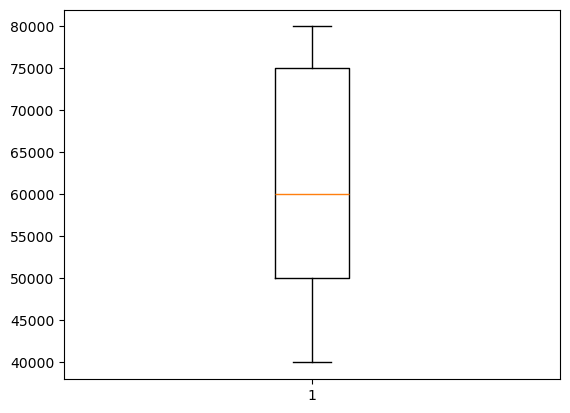

In [40]:
import matplotlib.pyplot as plt

plt.boxplot(working_df_tmp['AnnualIncome'])
plt.show()